# TREE - DECISION TREE WITHOUT SPECIFIC LEAF NODE

In [68]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn import tree

In [69]:
train=pd.read_csv("house_train.csv")
test = pd.read_csv("HOUSE_test.csv")

In [167]:
train['BsmtQual'].value_counts()

TA    686
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [166]:
train = train.fillna({'BsmtQual':'TA'})

In [180]:
train.BsmtQual.head()

0    1
1    1
2    1
3    2
4    1
Name: BsmtQual, dtype: int64

In [177]:
clean_up = {"BsmtQual":{"Gd":1, "TA":2, "Ex":3, "Fa":4}}

In [179]:
train.replace(clean_up,inplace =True)

In [181]:
features = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd','BsmtQual']

In [183]:
X = train[features]
y = train.SalePrice

In [184]:
train_X,test_X,train_y,test_y = train_test_split(X,y,random_state = 1)

In [185]:
one_model = tree.DecisionTreeRegressor(random_state = 1)


In [186]:
one_model.fit(train_X,train_y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')

In [187]:
val_pred = one_model.predict(test_X)

In [188]:
df = pd.DataFrame({'Id':train.Id[:365],'NewPrice':val_pred,'OldPrice':train.SalePrice[:365]})

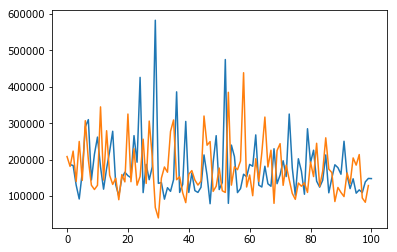

In [189]:
%matplotlib inline
one_plot = plt.plot(df.Id[:100],df.NewPrice[:100],df.OldPrice[:100])

In [190]:
one_error = mean_absolute_error(test_y,val_pred)
one_error

29784.28493150685

In [191]:
def MAPE(y_test,y_predict):
    mape = np.mean(np.abs(test_y-val_pred)/test_y)*100
    print("Mean absolute percentage error is: ",round(mape,2),"%")
    return mape

In [192]:
MAPE(test_y,val_pred)


Mean absolute percentage error is:  18.72 %


18.7234908466657

# TREE - DECISION TREE WITH SPECIFIC LEAF NODE

In [193]:
def get_mae(max_leaf_nodes,train_X,test_X,train_y,test_y):
    model = tree.DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes,random_state = 0)
    model=model.fit(train_X,train_y)
    pred_val = model.predict(test_X)
    mae = mean_absolute_error(test_y,pred_val)
    return(mae)

In [194]:
max_leaf_nodes = [5,50,100,250,300,500]

for i in max_leaf_nodes:
    one_error = get_mae(i,train_X,test_X,train_y,test_y)
    print("Max leaf node: %d \t \t Mean absolute error: %d" %(i,one_error))

Max leaf node: 5 	 	 Mean absolute error: 35044
Max leaf node: 50 	 	 Mean absolute error: 27509
Max leaf node: 100 	 	 Mean absolute error: 27403
Max leaf node: 250 	 	 Mean absolute error: 27815
Max leaf node: 300 	 	 Mean absolute error: 27894
Max leaf node: 500 	 	 Mean absolute error: 28712


In [195]:
one_error = {i:get_mae(i,train_X,test_X,train_y,test_y) for i in max_leaf_nodes}

In [196]:
best_leaf_node = min(one_error,key=one_error.get)
print("Best leaf node: ",best_leaf_node)

Best leaf node:  100


In [197]:
two_model = tree.DecisionTreeRegressor(max_leaf_nodes = best_leaf_node,random_state = 1)
two_model.fit(train_X,train_y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=100, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')

In [198]:
pred_val2 = two_model.predict(test_X)

In [199]:
df_sec = pd.DataFrame ({'Id':train.Id[:365],'New_price_one':pred_val2,'Old_price1':train.SalePrice[:365] })
df_sec.head()

,Id,New_price_one,Old_price1
0,1,181225.354167,208500
1,2,173500.000000,181500
2,3,122142.357143,223500
3,4,94060.000000,140000
4,5,148515.311111,250000


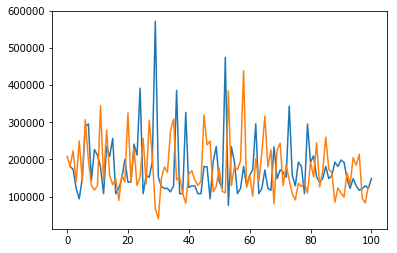

In [200]:
two_plot = plt.plot(df_sec.Id[:100],df_sec.New_price_one[:100],df_sec.Old_price1[:100])


In [201]:
two_error = mean_absolute_error(test_y,pred_val2)
two_error

26943.59630820301

# TREE - RANDOM FOREST

In [202]:
forest_model = RandomForestRegressor(random_state =1)
forest_model.fit(train_X,train_y)
three_pred = forest_model.predict(test_X)
print("Three error:", mean_absolute_error(test_y,three_pred))

Three error: 21861.01534246575


C:\Users\pdas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
